In [1]:
# Initial Setup
%matplotlib inline

from lblcrn import *

## Step 1 Define the Reaction System

Supply the reaction rules. Be sure to double check that the rates are correct.

In [2]:
sm = SpeciesManager()
s = Surface("forest", (10, 10), color="#e1e1e1")
prey = sm.sp('rabbit', Orbital('1s', 1.0))
pred = sm.sp('wolf', Orbital('1s', 2))



rsys = RxnSystem(
    sm,
    s,

    SurfaceRxn([prey, pred], [pred, pred], 1),
    SurfaceRxn([prey, s], [prey, prey], 1),
    SurfaceRxn([pred], [s], 0.1),
   
    SurfaceRxn([pred, s], [s, pred], 1),
    SurfaceRxn([prey, s], [s, prey], 1),

    Conc(pred, 2),
    Conc(prey, 2),
)

## Step 2 the Secret Sausage

In [10]:
results = scrn_simulate(rsys, 3, video=True, spectra_in_video=True)

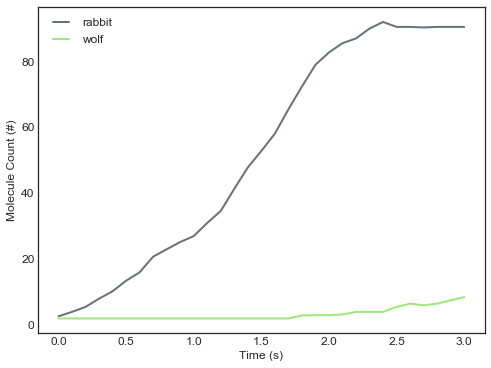

In [8]:
results.plot_evolution()

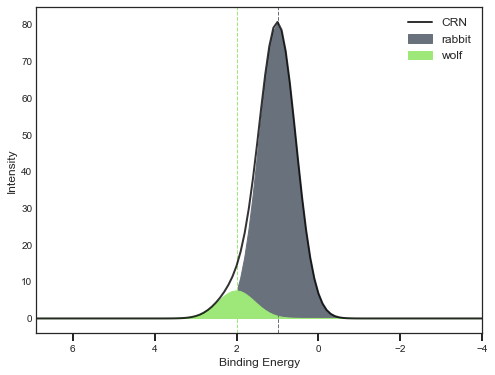

In [9]:
results.plot_gaussian(t=-1)

In [6]:
results.play_video(slowdown_factor=30)

## Use A Hexagonal Structure ##

In [7]:
sm = SpeciesManager()
s = Surface("Ag", (10, 10), structure="hexagon", color="#e1e1e1")

h2o_star = sm.sp("H2O*", Orbital('1s', 532.2))
h2o_multi = sm.sp("H2O_multi", Orbital('1s', 533.2), size=2)

h2o_hb = sm.sp("H2O_hb", Orbital('1s', 531.6))
# TODO: aggregate species with the same orbital
h2o_o_hb = sm.sp(h2o_hb, sub_species_name="H2O_O_hb")
h2o_oh_hb = sm.sp(h2o_hb, sub_species_name="H2O_OH_hb")

o_star = sm.sp("O*", Orbital('1s', 530.0))
oh_star = sm.sp("OH*", Orbital('1s', 530.9))
o_star_threef = sm.sp(o_star, site=s.threefold)
oh_star_threef = sm.sp(oh_star, site=s.threefold)


rsys = RxnSystem(
    sm,
    s,

    SurfaceRevRxn([o_star], [h2o_o_hb], 1.238045, 0.127713),
    SurfaceRevRxn([oh_star], [h2o_oh_hb], 0.526204, 0.30048),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [oh_star, oh_star_threef], 6.220646, 0.160755),
    SurfaceRevRxn([h2o_oh_hb, s.threefold], [h2o_star, oh_star_threef], 0.299507, 1),
    SurfaceRevRxn([h2o_o_hb, s.threefold], [h2o_star, o_star_threef], 0.16713, 1),
   
    SurfaceRevRxn([h2o_star], [s], 0.794455, 0.199022),
    SurfaceRevRxn([h2o_oh_hb, s], [h2o_multi, h2o_multi], 0.400796, 0.3945),
    
    SurfaceRevRxn([o_star_threef, o_star_threef], [s.threefold, s.threefold], 0.00096, 76.964514),
    
    SurfaceRxn([s.threefold, o_star_threef], [o_star_threef, s.threefold], 3),
    SurfaceRxn([s.threefold, oh_star_threef], [oh_star_threef, s.threefold], 3),
    SurfaceRxn([s, o_star], [o_star, s], 3),
    SurfaceRxn([s, oh_star], [oh_star, s], 3),
    SurfaceRxn([s, h2o_star], [h2o_star, s], 3),
    
    
    SurfaceRevRxn([oh_star, s.threefold], [s, oh_star_threef], 10, 0.5),
    SurfaceRevRxn([o_star, s.threefold], [s, o_star_threef], 10, 0.5),

    Conc(o_star_threef, 25),
)

In [ ]:
# If you need only the concentration trajectories, set video=False to save time
results = scrn_simulate(rsys, 200, video=True, spectra_in_video=True)

10 x 10 hex grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag, Ag]
intersection grid:
[3F, O*_3F, 3F, 3F, 3F, 3F, O*_3F, O*_3F, 3F, 3F, 3F, 3F, O*_3F, 3F, 3F, 3F, 3F, O*_3F]
[O*_3F, 3F, O*_3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, O*_3F, 3F]
[3F, 3F, 3F, 3F, O*_3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, O*_3F]
[3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, O*_3F, 3F, 3F, O*_3F, 3F, 3F, 3F, 3F, 3F, 3F]
[3F, 3F, O*_3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F, 3F

In [ ]:
results.plot_evolution(use_raw_data=True)

In [ ]:
results.play_video(slowdown_factor=30)